<img src="glass-problem.png">

In [1]:
import numpy as np
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

In [2]:
T_air = 30 + 273.15
T_init = 300 + 273.15
alpha = 5 * 10 ** -7 * 60
guesses = [0.5,2.5,6,9,12.5,15.5,19,22,24,28]
thiccs = [0.005, 0.01, 0.015, 0.02, 0.025]

In [3]:
def equation(squiggle):
    global delta_x
    h = 100
    k = 1.2
    return squiggle * np.tan(squiggle) - (h*delta_x) / (2 * k)

In [4]:
def temp(t, dx):
    global T_init, T_air, delta_x, alpha, guesses, thiccs
    delta_x = dx
    
    sum = 0
    for guess in guesses:
        sqi = float(fsolve(equation, guess))
        numer = -alpha * (sqi**2)
        denom = (delta_x/2) ** 2
        stuff = (4*np.sin(sqi) / (2*sqi + np.sin(2*sqi))) * np.exp(numer*t/denom)
        sum += stuff
    
    return sum * (T_init - T_air) + T_air - 273.15

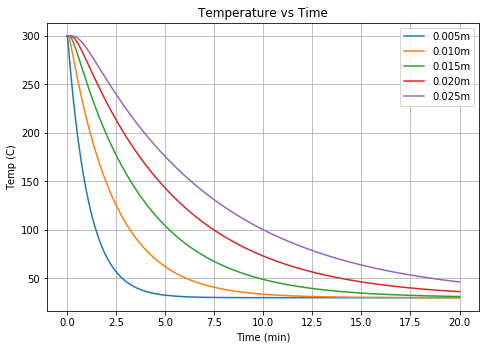

In [5]:
x = np.linspace(0, 20, 1000)
y1= temp(x, 0.005)
y2= temp(x, 0.010)
y3= temp(x, 0.015)
y4= temp(x, 0.020)
y5= temp(x, 0.025)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)
ax.grid()
ax.set_title("Temperature vs Time")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temp (C)")
ax.legend(['0.005m', '0.010m', '0.015m', '0.020m', '0.025m'])
ax.get_legend().set_visible(True)

In [6]:
out = ' \t '
for t in thiccs:
    out = ''.join([out, str(t), '\t\t\t'])
print(out)
for s in range (0,21):
    out = ''
    
    for t in thiccs:
        out = ''.join([out, str(temp(s,t)), '\t'])
    
    print(s,'\t',out)

 	 0.005			0.01			0.015			0.02			0.025			
0 	 299.93740749082906	299.8749100087572	299.8125162363348	299.75023477698517	299.688074149424	
1 	 139.50150161341958	214.77133465412794	252.4347500706997	274.5859875965119	287.4319144672919	
2 	 73.02044247924994	149.27593408448757	199.15615860815086	232.4241234371816	255.6963497619888	
3 	 46.901672066966796	106.99649018147471	158.59461991155854	196.8043584848117	225.30667983576842	
4 	 36.64025059242641	79.70373567612762	127.75911141505196	167.42914497574202	198.7464849513333	
5 	 32.608790879122296	62.08537602609778	104.31760231258687	143.2263243970669	175.77111513693103	
6 	 31.02492967038836	50.712152532038715	86.49709713455144	123.28586889280837	155.92110072450714	
7 	 30.402669618959976	43.37036730258359	72.94974387366847	106.85715572528738	138.773820334768	
8 	 30.158198973761728	38.63100643593032	62.65088991068865	93.32172765213159	123.96153714517527	
9 	 30.062152479652923	35.57159503633653	54.821582524348855	82.17004395946935	111.1